## 🌲 Forest Cover Type Prediction

Given *data about trees and forests*, let's try to predict the **cover type** of a given forest.

We will use a logistic regression model to make our predictions, but first we have to deal with the imbalanced classes.

Data source: https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

/home/aditya/miniconda3/envs/dsenv/lib/python3.10/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [2]:
data = pd.read_csv('covtype.csv')
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [3]:
data['Cover_Type'].value_counts()

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

In [4]:
# Start class labels from 0 rather than 1
data['Cover_Type'] = data['Cover_Type'] - 1

In [5]:
data['Cover_Type'].value_counts()

Cover_Type
1    283301
0    211840
2     35754
6     20510
5     17367
4      9493
3      2747
Name: count, dtype: int64

### Imbalanced Data: Class Distribution

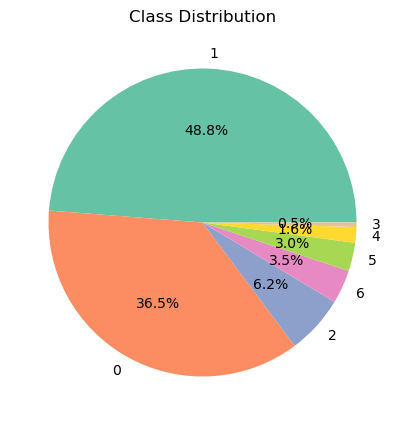

In [6]:
cmap = sns.color_palette('Set2', as_cmap=True)(np.arange(7))
plt.figure(figsize=(5,5))
plt.pie(
    data['Cover_Type'].value_counts().values,
    colors = cmap,
    labels = data['Cover_Type'].value_counts().keys(),
    autopct = '%.1f%%'
)
plt.title('Class Distribution')
plt.show()

### Some Helper functions

In [7]:
def split_and_scale(df):
    df = df.copy()

    # Split df into X and y
    y = df['Cover_Type'].copy()
    X = df.drop('Cover_Type', axis=1).copy()

    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=123)

    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = pd.DataFrame(scaler.transform(X_train), columns= X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

    return X_train, X_test, y_train, y_test

### Training (Imbalanced)

In [8]:
imbalanced_data = data.copy()
X_train, X_test, y_train, y_test = split_and_scale(imbalanced_data)

In [9]:
X_train

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0.136862,-0.990095,-0.548171,-1.127186,-0.882119,1.085578,0.405508,-0.219519,-0.327839,0.343255,...,-0.215472,-0.315326,-0.291021,-0.052455,-0.056932,-0.014711,-0.022181,-0.165963,-0.155756,-0.123674
1,-1.310526,1.796995,-0.280954,-0.196052,0.490036,0.095575,-0.416273,-0.270149,0.325350,-1.062210,...,-0.215472,-0.315326,-0.291021,-0.052455,-0.056932,-0.014711,-0.022181,-0.165963,-0.155756,-0.123674
2,-0.367043,1.421810,-1.884256,-0.252484,-0.384713,0.317284,0.181386,0.691820,0.377605,1.439670,...,-0.215472,-0.315326,-0.291021,-0.052455,-0.056932,-0.014711,-0.022181,-0.165963,-0.155756,-0.123674
3,-2.093189,0.733970,0.787914,-0.953186,-0.453321,-1.313498,-1.238054,1.501900,1.657857,-1.236760,...,-0.215472,-0.315326,-0.291021,-0.052455,-0.056932,-0.014711,-0.022181,-0.165963,-0.155756,-0.123674
4,-0.052549,-1.052626,-0.815388,-0.106700,-0.796359,1.420706,0.293447,-0.067629,-0.144946,2.951679,...,-0.215472,-0.315326,-0.291021,-0.052455,-0.056932,-0.014711,-0.022181,-0.165963,-0.155756,-0.123674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406703,0.504964,1.520073,1.188739,-0.986105,-0.573384,0.542838,-2.022481,-0.776449,1.161433,-1.062210,...,-0.215472,-0.315326,-0.291021,-0.052455,-0.056932,-0.014711,-0.022181,-0.165963,-0.155756,-0.123674
406704,0.447783,-0.078931,-0.548171,-0.252484,-0.298953,1.058666,0.816399,0.793080,-0.171074,-1.099236,...,-0.215472,-0.315326,-0.291021,-0.052455,-0.056932,-0.014711,-0.022181,-0.165963,-0.155756,-0.123674
406705,-1.542823,-0.775703,-0.815388,-0.468808,-0.985031,-1.126391,0.629630,0.033630,-0.380095,2.691743,...,-0.215472,-0.315326,-0.291021,-0.052455,-0.056932,-0.014711,-0.022181,-0.165963,-0.155756,-0.123674
406706,-0.660095,0.117595,-0.948996,-0.868538,-0.744904,0.399945,0.517569,0.995600,0.220840,3.305312,...,-0.215472,-0.315326,-0.291021,-0.052455,-0.056932,-0.014711,-0.022181,-0.165963,-0.155756,-0.123674


In [10]:
y_train

121246    0
576057    1
58587     1
10818     5
53091     1
         ..
194278    0
192476    0
17730     4
28030     1
277869    2
Name: Cover_Type, Length: 406708, dtype: int64

In [11]:
X_test

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,-0.127599,-0.963296,0.119871,0.706867,0.387124,-1.078973,0.442862,-0.827079,-0.745881,-0.815120,...,-0.215472,3.171318,-0.291021,-0.052455,-0.056932,-0.014711,-0.022181,-0.165963,-0.155756,-0.123674
1,-0.367043,0.260523,-0.815388,-0.821511,-0.590536,-0.099222,0.368154,1.147490,0.403733,0.272982,...,-0.215472,-0.315326,-0.291021,-0.052455,-0.056932,-0.014711,-0.022181,-0.165963,-0.155756,-0.123674
2,1.609268,0.465981,-0.147346,2.033028,-0.693448,-0.595185,-0.042736,1.400640,0.821774,1.528078,...,-0.215472,-0.315326,3.436172,-0.052455,-0.056932,-0.014711,-0.022181,-0.165963,-0.155756,-0.123674
3,-0.577898,-0.802502,0.387088,0.570488,0.369972,0.244235,0.816399,-0.978969,-1.216177,-0.052693,...,-0.215472,-0.315326,-0.291021,-0.052455,-0.056932,-0.014711,-0.022181,-0.165963,-0.155756,-0.123674
4,0.036796,-1.034760,-0.280954,0.203678,1.038898,0.068021,0.330801,-0.523299,-0.484605,0.147548,...,-0.215472,-0.315326,3.436172,-0.052455,-0.056932,-0.014711,-0.022181,-0.165963,-0.155756,-0.123674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174299,0.955262,0.760769,0.387088,0.829137,1.690671,-0.031299,-0.976578,1.451270,1.527219,-0.218931,...,-0.215472,-0.315326,3.436172,-0.052455,-0.056932,-0.014711,-0.022181,-0.165963,-0.155756,-0.123674
174300,0.554997,-1.302749,-0.681779,-0.760376,-0.607688,-1.255828,-0.080090,-0.118259,0.142457,0.044027,...,-0.215472,-0.315326,-0.291021,-0.052455,-0.056932,-0.014711,-0.022181,-0.165963,-0.155756,-0.123674
174301,-0.084713,-0.686373,1.055131,-1.268267,-0.796359,-1.195595,1.152582,-1.485269,-1.895494,-0.258223,...,-0.215472,-0.315326,3.436172,-0.052455,-0.056932,-0.014711,-0.022181,-0.165963,-0.155756,-0.123674
174302,0.987427,-0.257590,-1.216213,1.125407,-0.298953,-0.816894,0.629630,0.691820,-0.014308,0.287339,...,-0.215472,-0.315326,3.436172,-0.052455,-0.056932,-0.014711,-0.022181,-0.165963,-0.155756,-0.123674


In [14]:
def evaluate_model(model, class_balance, X_test, y_test):
    model_acc = model.score(X_test, y_test)
    print("Accuracy: ({}): {:.2f}%".format(class_balance, model_acc * 100))
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report:\n-----------------------------\n", clr)

In [13]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

/home/aditya/miniconda3/envs/dsenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: (Imbalanced): 72.44%


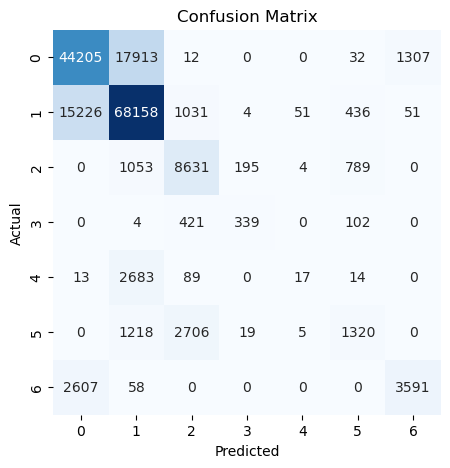

Classification Report:
-----------------------------
               precision    recall  f1-score   support

           0       0.71      0.70      0.70     63469
           1       0.75      0.80      0.77     84957
           2       0.67      0.81      0.73     10672
           3       0.61      0.39      0.48       866
           4       0.22      0.01      0.01      2816
           5       0.49      0.25      0.33      5268
           6       0.73      0.57      0.64      6256

    accuracy                           0.72    174304
   macro avg       0.60      0.50      0.52    174304
weighted avg       0.71      0.72      0.71    174304



In [16]:
evaluate_model(model1, "Imbalanced", X_test, y_test)

### Training (Undersampling)

In [17]:
undersampled_data = data.copy()

In [19]:
undersampled_data['Cover_Type'].value_counts()

Cover_Type
1    283301
0    211840
2     35754
6     20510
5     17367
4      9493
3      2747
Name: count, dtype: int64

In [22]:
min_class_size = np.min(undersampled_data['Cover_Type'].value_counts().values)
print("Size of smallest class:", min_class_size)

Size of smallest class: 2747


In [29]:
undersampled_data.query("Cover_Type==1")

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,1
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,1
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,1
11,2886,151,11,371,26,5253,234,240,136,4051,...,0,0,0,0,0,0,0,0,0,1
12,2742,134,22,150,69,3215,248,224,92,6091,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576882,2617,29,13,390,128,2081,215,211,130,592,...,0,0,0,0,0,0,0,0,0,1
576883,2614,21,13,379,125,2051,211,212,135,618,...,0,0,0,0,0,0,0,0,0,1
576884,2612,17,13,371,123,2021,208,211,138,644,...,0,0,0,0,0,0,0,0,0,1
576885,2610,16,14,365,110,1991,208,211,138,671,...,0,0,0,0,0,0,0,0,0,1


In [30]:
### Undersampling the majority classes
class_subsets = [undersampled_data.query("Cover_Type== " + str(i))for i in range(7)]
class_subsets

[        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
 40           2699     347      3                                 0   
 51           2739     323     25                                85   
 52           2696      72      2                                30   
 55           2722     315     24                                30   
 67           2919      13     13                                90   
 ...           ...     ...    ...                               ...   
 565432       2826      72     14                                67   
 565433       2820      69     14                                42   
 565434       2812      67     16                                30   
 565527       2832      45     17                                85   
 565528       2827      43     18                                67   
 
         Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
 40                                   0                             20

In [33]:
class_subsets[6]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1654,3273,159,12,300,55,2863,233,242,138,2439,...,0,0,0,0,0,0,0,0,0,6
1655,3264,137,10,283,45,2773,236,236,131,2529,...,0,0,0,0,0,0,0,0,0,6
1656,3256,143,7,234,37,2713,231,239,140,2589,...,0,0,0,0,0,0,0,0,0,6
1662,3268,176,16,270,50,2955,227,247,148,2347,...,0,0,0,0,0,0,0,0,0,6
1663,3268,179,15,270,50,2925,225,248,151,2377,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553565,3304,59,21,30,-2,2468,231,190,83,4072,...,0,0,0,1,0,0,0,0,0,6
553760,3338,62,7,30,-4,2340,226,226,134,4089,...,0,0,0,1,0,0,0,0,0,6
553761,3335,56,11,30,-1,2368,227,218,123,4091,...,0,0,0,1,0,0,0,0,0,6
553762,3329,63,15,30,-2,2395,232,207,104,4093,...,0,0,0,1,0,0,0,0,0,6


In [34]:
for i in range(7):
    class_subsets[i] = class_subsets[i].sample(min_class_size, random_state=123)

In [39]:
class_subsets[0]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
449586,3109,160,11,258,40,1384,231,242,141,3420,...,0,1,0,0,0,0,0,0,0,0
287825,3157,275,27,85,11,1084,139,235,229,2522,...,0,0,0,0,0,0,0,0,0,0
347980,3086,93,16,30,-2,2584,243,214,96,1889,...,0,0,0,0,0,0,0,0,0,0
174387,3181,261,25,212,42,4656,149,243,227,3382,...,0,0,0,0,0,0,0,0,0,0
84741,3054,103,4,690,50,5810,227,234,141,3891,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413539,3215,161,17,95,9,1831,235,242,132,1766,...,0,1,0,0,0,0,0,0,0,0
193943,3071,137,10,108,13,4072,236,236,131,624,...,0,0,0,0,0,0,0,0,0,0
202497,3278,349,5,560,65,6125,211,232,159,713,...,0,0,0,0,0,0,0,0,0,0
422944,3201,284,14,481,91,1194,180,239,199,2696,...,0,0,0,0,0,0,0,0,0,0


In [40]:
undersampled_data = pd.concat(class_subsets, axis=0).sample(frac=1.0, random_state=123).reset_index(drop=True)
undersampled_data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3426,5,13,319,78,3844,202,213,147,3290,...,1,0,0,0,0,0,0,0,0,6
1,3032,138,12,124,17,1637,238,236,127,1080,...,0,0,0,0,0,0,0,0,0,0
2,2165,204,32,295,146,603,186,249,177,295,...,0,0,0,0,0,0,0,0,0,2
3,2834,80,16,513,169,532,240,210,95,2322,...,0,0,0,0,0,0,0,0,0,4
4,2972,293,4,30,5,1539,209,239,168,1630,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,2801,110,9,42,4,713,236,230,126,108,...,0,0,0,0,0,0,0,0,0,4
19225,2508,116,28,351,100,330,254,200,53,1209,...,0,0,0,0,0,0,0,0,0,2
19226,1998,325,32,335,143,306,125,187,193,969,...,0,0,0,0,0,0,0,0,0,5
19227,3370,315,3,0,0,4337,212,237,163,4160,...,0,0,0,0,0,0,0,0,1,6


In [42]:
undersampled_data['Cover_Type'].value_counts()

Cover_Type
6    2747
0    2747
2    2747
4    2747
1    2747
3    2747
5    2747
Name: count, dtype: int64

In [43]:
X_train, X_test, y_train, y_test = split_and_scale(undersampled_data)

In [44]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)

/home/aditya/miniconda3/envs/dsenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: (Undersampling): 70.88%


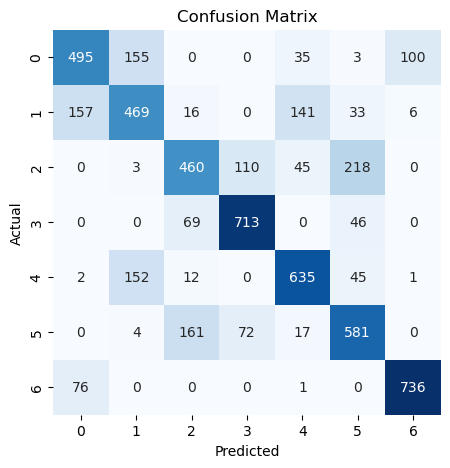

Classification Report:
-----------------------------
               precision    recall  f1-score   support

           0       0.68      0.63      0.65       788
           1       0.60      0.57      0.58       822
           2       0.64      0.55      0.59       836
           3       0.80      0.86      0.83       828
           4       0.73      0.75      0.74       847
           5       0.63      0.70      0.66       835
           6       0.87      0.91      0.89       813

    accuracy                           0.71      5769
   macro avg       0.71      0.71      0.71      5769
weighted avg       0.71      0.71      0.71      5769



In [45]:
evaluate_model(model2, "Undersampling", X_test, y_test)

### Training With OverSampling

In [46]:
oversampled_data = data.copy()

In [47]:
oversampled_data['Cover_Type'].value_counts()

Cover_Type
1    283301
0    211840
2     35754
6     20510
5     17367
4      9493
3      2747
Name: count, dtype: int64

In [48]:
max_class_size = np.max(oversampled_data['Cover_Type'].value_counts().values)
print("Size of largest class: ", max_class_size)

Size of largest class:  283301


In [57]:
pd.DataFrame.sample?

Signature:
pd.DataFrame.sample(
    self,
    n: 'int | None' = None,
    frac: 'float | None' = None,
    replace: 'bool_t' = False,
    weights=None,
    random_state: 'RandomState | None' = None,
    axis: 'Axis | None' = None,
    ignore_index: 'bool_t' = False,
) -> 'Self'
Docstring:
Return a random sample of items from an axis of object.

You can use `random_state` for reproducibility.

Parameters
----------
n : int, optional
    Number of items from axis to return. Cannot be used with `frac`.
    Default = 1 if `frac` = None.
frac : float, optional
    Fraction of axis items to return. Cannot be used with `n`.
replace : bool, default False
    Allow or disallow sampling of the same row more than once.
weights : str or ndarray-like, optional
    Default 'None' results in equal probability weighting.
    If passed a Series, will align with target object on index. Index
    values in weights not found in sampled object will be ignored and
    index values in sampled object not in w

In [58]:
# Oversampling the minority classes
class_subsets = [oversampled_data.query("Cover_Type== " + str(i))for i in range(7)]
for i in range(7):
    class_subsets[i] = class_subsets[i].sample(max_class_size, replace=True, random_state=123)
    
oversampled_data = pd.concat(class_subsets, axis=0).sample(frac=1.0, random_state=123).reset_index(drop=True)
oversampled_data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3426,296,27,277,114,1328,136,221,220,1697,...,0,0,0,0,0,0,0,0,1,6
1,3135,139,17,180,1,1762,243,232,112,2105,...,0,1,0,0,0,0,0,0,0,0
2,2783,88,12,90,12,2187,238,220,110,3360,...,0,0,0,0,0,0,0,0,0,1
3,2166,280,37,60,45,782,96,215,244,633,...,0,0,0,0,0,0,0,0,0,2
4,2807,93,34,190,105,268,249,167,17,2614,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983102,2867,54,24,391,171,402,226,181,75,1516,...,0,0,0,0,0,0,0,0,0,4
1983103,2152,331,7,0,0,752,203,231,167,1556,...,0,0,0,0,0,0,0,0,0,3
1983104,3139,111,16,240,-32,3301,246,221,99,5060,...,0,0,0,0,0,0,0,0,0,0
1983105,2943,155,19,212,28,1905,239,238,120,1537,...,0,0,0,0,0,0,0,0,0,0


In [59]:
oversampled_data['Cover_Type'].value_counts()

Cover_Type
6    283301
0    283301
1    283301
2    283301
4    283301
3    283301
5    283301
Name: count, dtype: int64

In [61]:
X_train, X_test, y_train, y_test = split_and_scale(oversampled_data)
model3 = LogisticRegression()
model3.fit(X_train, y_train)

/home/aditya/miniconda3/envs/dsenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: (Oversampling): 70.71%


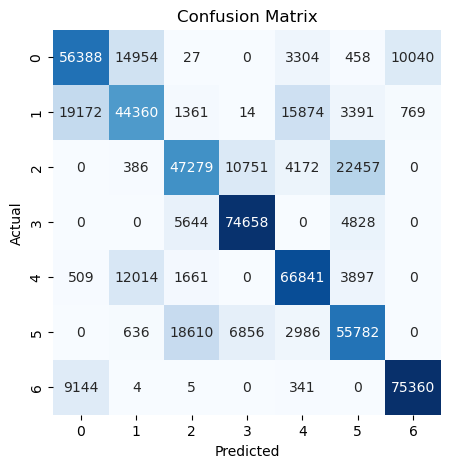

Classification Report:
-----------------------------
               precision    recall  f1-score   support

           0       0.66      0.66      0.66     85171
           1       0.61      0.52      0.56     84941
           2       0.63      0.56      0.59     85045
           3       0.81      0.88      0.84     85130
           4       0.71      0.79      0.75     84922
           5       0.61      0.66      0.64     84870
           6       0.87      0.89      0.88     84854

    accuracy                           0.71    594933
   macro avg       0.70      0.71      0.70    594933
weighted avg       0.70      0.71      0.70    594933



In [62]:
evaluate_model(model3, "Oversampling", X_test, y_test)